# 激活函數
```
step01 - 定義sigmoid函式
step02 - 建立資料(x = -5~5中間每隔0.1，創建一個點)
step03 - 將各點x激活sigmoid -> y
step04 - 劃出圖形
```

## sigmoid 


In [3]:
import numpy as np
import matplotlib.pylab as plt
import time

def sigmoid(z):
    return 1 / ( 1  + np.exp(-z) )
    

In [4]:
# -5~5中間每隔0.1，創建一個點
start = time.time()
X = np.arange(-5.0, 5.0, 0.1)
X

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [5]:
Y = sigmoid(X)
Y

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

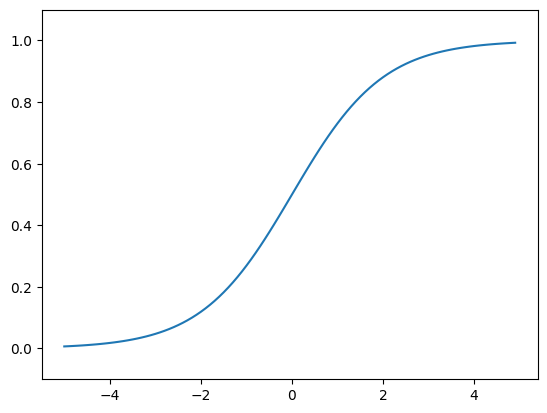

It cost 0.000000 sec


In [6]:
start = time.time()
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
now = time.time()
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()
print("It cost %f sec" % (now-start))


## Tangent
$$ -1\leq  tanh(z)\leq 1$$

公式：
$$z=tanh(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}} \quad$$
    
優點就是與 sigmoid 的區別是，tanh 解決了sigmoid的輸出非「零為中心」的問題，因此實際應用中 tanh 會比 sigmoid 更好。<br>

缺點類似sigmoid，雖然收斂速度相對快了，但也存在梯度彌散，而且也有冪計算，相對耗時。

In [7]:
def tangent(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))



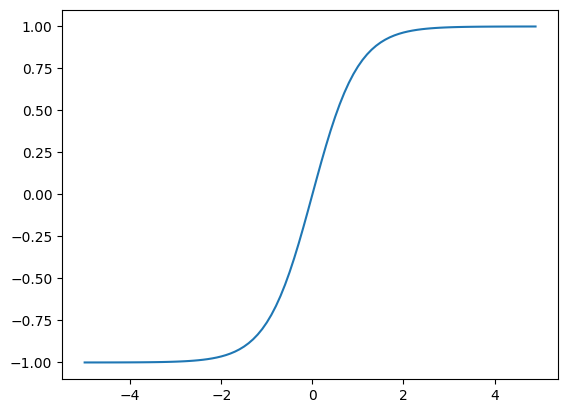

It cost 0.000000 sec


In [8]:
start = time.time()
x = np.arange(-5.0, 5.0, 0.1)
y = tangent(x)
now = time.time()
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()
print("It cost %f sec" % (now-start))

## Relu
$$relu=max(0,z)$$
優點：
* SGD算法的收斂速度比 sigmoid 和 tanh 快；（梯度不會飽和，解決了梯度消失問題）
* 計算復雜度低，不需要進行指數運算；
* 適合用於後向傳播。

缺點：

* ReLU的輸出不是zero-centered；
* Dead ReLU Problem（神經元壞死現象）：某些神經元可能永遠不會被激活，導致相應參數永遠不會被更新（在負數部分，梯度為0）。產生這種現象的兩個原因：參數初始化問題；learning rate太高導致在訓練過程中參數更新太大。 避免將learning rate設置太大或使用自動調節learning rate的算法。

In [9]:
def relu(x):
    return np.maximum(0,x)
    '''
    for i in range(len(x)):
        if x[i] < 0:
            x[i]=0
    return x
    '''

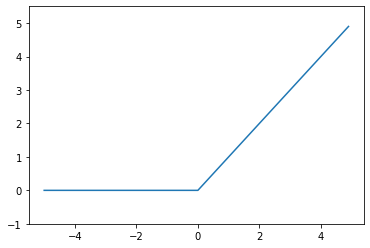

It cost 0.000000 sec


In [31]:
start = time.time()
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
now = time.time()
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()
print("It cost %f sec" % (now-start))